In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [75]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
circuit.h(0)
# circuit.cx(0, 1)
circuit.measure([0,1], [0,1])


In [76]:
circuit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

In [77]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'01': 511, '00': 489}


## Basic Circuits

In [79]:
import numpy as np
from qiskit import QuantumCircuit

%matplotlib inline

In [80]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [81]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circuit


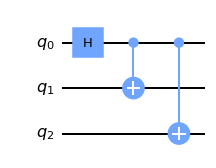

In [83]:
circ.draw('mpl')
print('circuit')

In [90]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [92]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

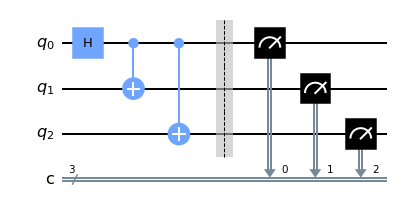

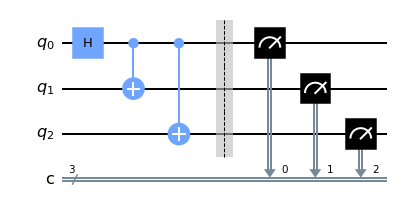

In [93]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

In [95]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor


# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 504, '11': 496}


<ipython-input-95-762128a42d2b>:15: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = bell + meas
/home/keisuke/miniconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


plots


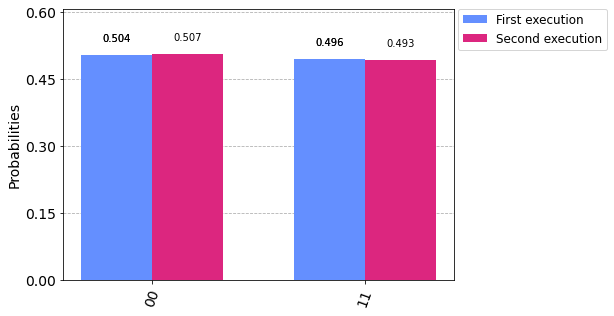

In [104]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=10000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)
print('plots')

plots


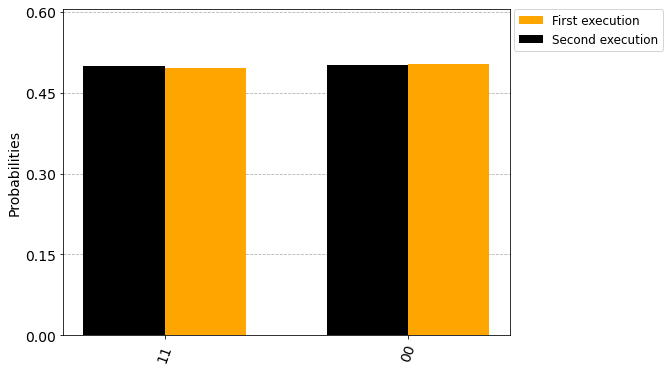

In [103]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(8,6),
               color=['orange', 'black'], bar_labels=False)
print('plots')

In [116]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [115]:
qc = QuantumCircuit(1)
qc.u3(np.pi/2,np.pi/2,np.pi/2,0)
qc.draw()

┌─────────────────┐
q_0: ┤ U3(π/2,π/2,π/2) ├
     └─────────────────┘

In [118]:
qc = QuantumCircuit(1)
qc.ry(np.pi/2,0)
qc.draw()

┌─────────┐
q_0: ┤ RY(π/2) ├
     └─────────┘

In [119]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

In [123]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [124]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [127]:

qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

┌───┐ ┌─┐
q151_0: ─┤ X ├─┤M├
         └─╥─┘ └╥┘
        ┌──╨──┐ ║ 
  c0: 1/╡ = 0 ╞═╩═
        └─────┘ 0

In [226]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.rx(np.pi/4,q[0])
# qc.measure(q,c)
# qc.x(q[0]).c_if(c, 0)
# qc.measure(q,c)
qc.draw()

┌─────────┐
q598_0: ┤ RX(π/4) ├
        └─────────┘
 c17: 1/═══════════

In [229]:
qc = QuantumCircuit(q, c)
qc.rx(np.pi/4,q[0])
qc.rx(np.pi/4,q[0])
qc.measure(q,c)

In [230]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=2**13)
job.result().get_counts(qc)

{'0': 4105, '1': 4087}

## Fidelity

In [144]:
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw()

┌───────────────────────────────────────────────────────────────────┐
q226_0: ┤0                                                                  ├
        │                                                                   │
q226_1: ┤1 initialize(0.25j,0.35355,0.25+0.25j,0,0,0.35355+0.70711j,0.25,0) ├
        │                                                                   │
q226_2: ┤2                                                                  ├
        └───────────────────────────────────────────────────────────────────┘

In [132]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
qc_state = job.result().get_statevector(qc)
qc_state

array([2.50000000e-01-2.20132778e-17j, 1.52655666e-16-3.53553391e-01j,
       2.50000000e-01-2.50000000e-01j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, 7.07106781e-01-3.53553391e-01j,
       9.02056208e-17-2.50000000e-01j, 0.00000000e+00+0.00000000e+00j])

In [133]:
state_fidelity(desired_vector,qc_state)

1.0000000000000009